In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
athlete=pd.read_csv('athlete_events.csv')
regions=pd.read_csv('noc_regions.csv')


In [2]:
athlete.head()
# regions.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
athlete_df=athlete.merge(regions,how='left',on='NOC')
athlete_df.head()
athlete_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [4]:
athlete_df.shape

athlete_df.rename(columns={'region':'Region','notes':'Notes'},inplace=True)
athlete_df.head()
athlete_df.info()
athlete_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
#check null values
nan_vals= athlete_df.isna()
nan_Cols=nan_vals.any()
nan_Cols


ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [6]:
list = athlete_df.isnull().sum()
athlete_df.columns[athlete_df.isnull().any()]

Index(['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes'], dtype='object')

C:\Users\mishr\AppData\Local\Temp\ipykernel_19336\1615167970.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index , y=top_10_countries , palette= 'Set2');


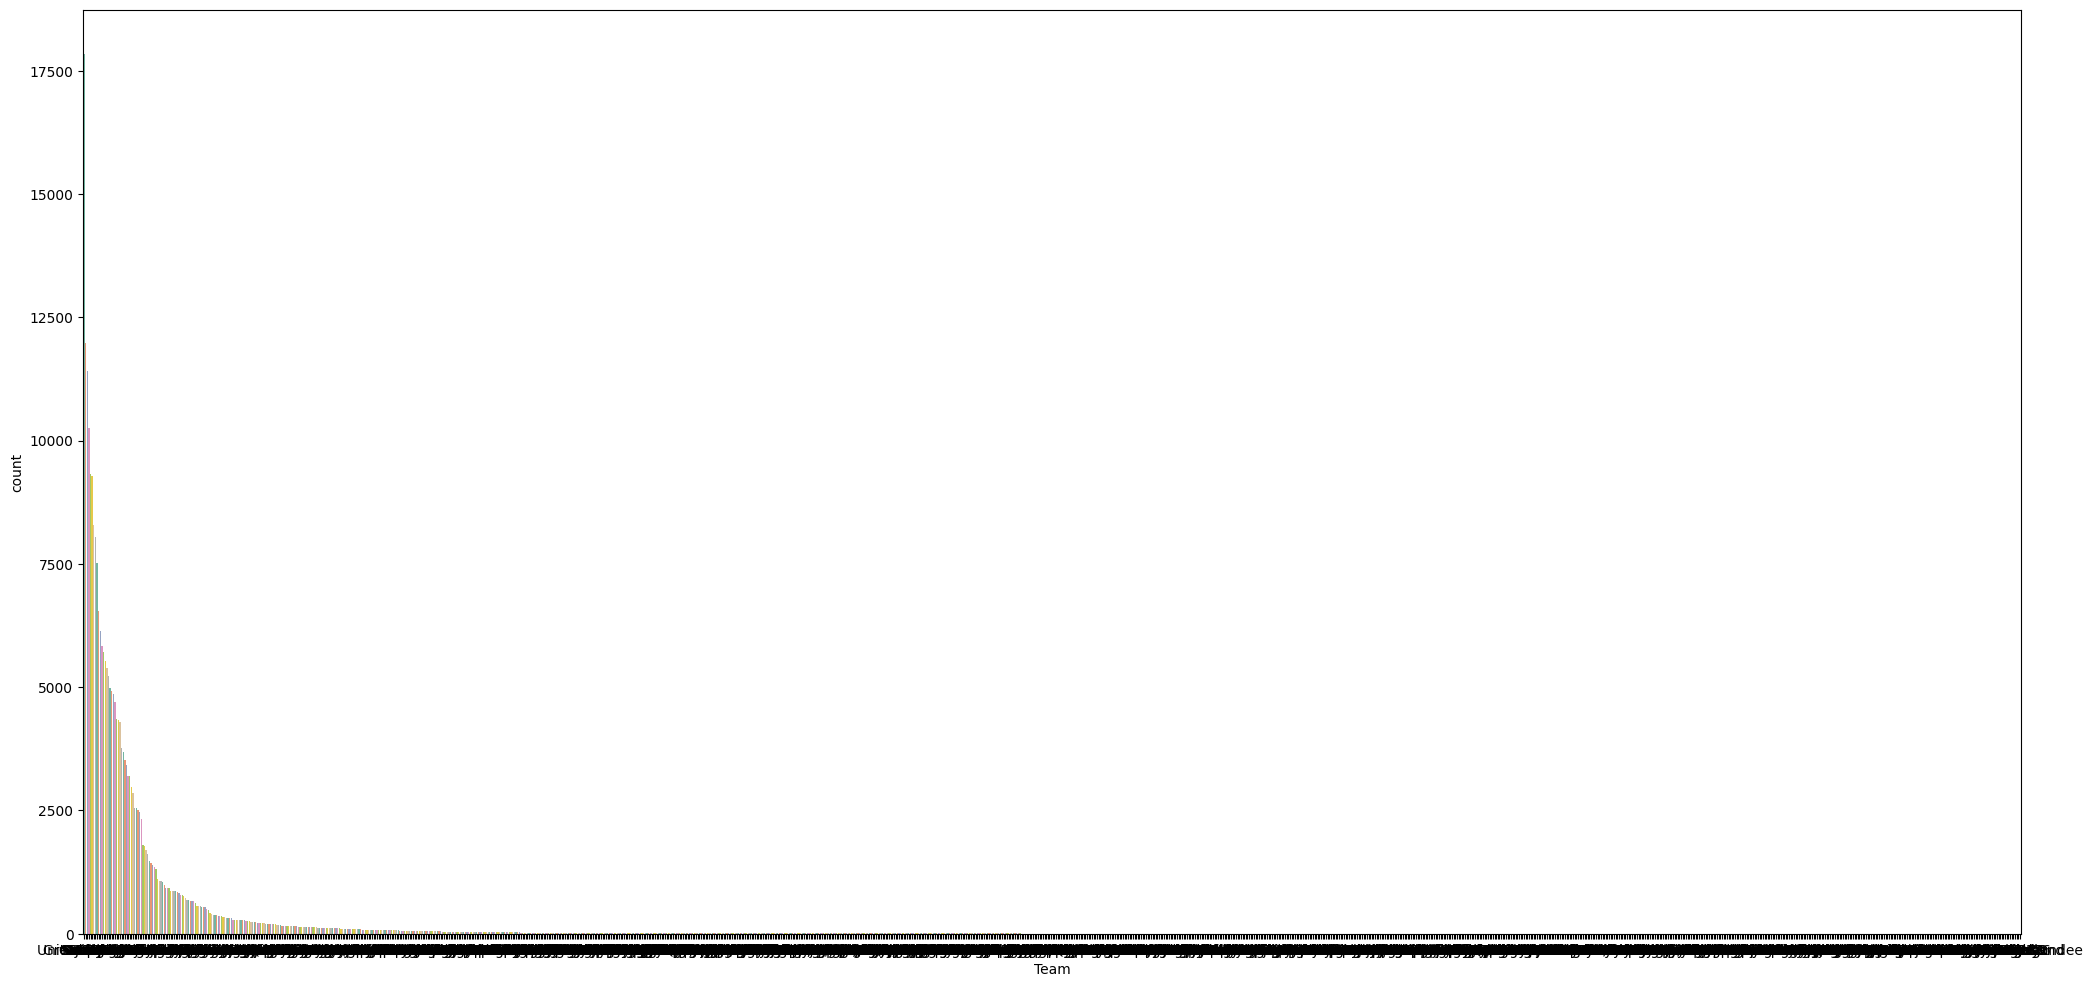

In [7]:
athlete_df.query('Team == "India"').head(5)
top_10_countries = athlete_df.Team.value_counts().sort_values(ascending=False)
plt.figure(figsize=(25,12))
 
sns.barplot(x=top_10_countries.index , y=top_10_countries , palette= 'Set2');

plt.show()

([<matplotlib.patches.Wedge at 0x1fb81ea7a10>,
 [Text(0.7147310163003329, -0.8361576252945934, 'M'),
  Text(-0.7147309380136028, 0.836157692212537, 'F')],
 [Text(0.38985328161836336, -0.4560859774334145, '72.5'),
  Text(-0.3898532389165105, 0.456086013934111, '27.5')])

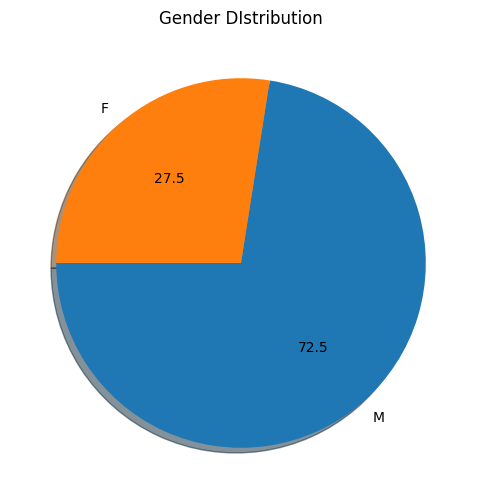

In [8]:
gender_ratio=athlete_df.Sex.value_counts()
plt.figure(figsize=(12,6))
plt.title("Gender DIstribution")
plt.pie(gender_ratio,labels=gender_ratio.index,autopct='%1.1f',startangle=180,shadow=True)

In [9]:
winter_sports= athlete_df[athlete_df.Season == 'Winter'].Sport.unique()
summer_sports= athlete_df[athlete_df.Season == 'Summer'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [10]:
athlete_df.Medal.value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [11]:
female_participants=athlete_df[(athlete_df.Sex =='F')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head

<bound method NDFrame.head of     Year   Sex
0   1900    33
1   1904    16
2   1906    11
3   1908    47
4   1912    87
5   1920   134
6   1924   261
7   1928   437
8   1932   369
9   1936   549
10  1948   761
11  1952  1682
12  1956  1139
13  1960  1730
14  1964  1752
15  1968  2193
16  1972  2608
17  1976  2606
18  1980  2186
19  1984  2983
20  1988  4223
21  1992  5178
22  1994  1105
23  1996  5008
24  1998  1384
25  2000  5431
26  2002  1582
27  2004  5546
28  2006  1757
29  2008  5816
30  2010  1847
31  2012  5815
32  2014  2023
33  2016  6223>

C:\Users\mishr\AppData\Local\Temp\ipykernel_19336\2290532946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year',data=woman,palette='Spectral')


<Axes: title={'center': 'Woman participation'}, xlabel='Year', ylabel='count'>

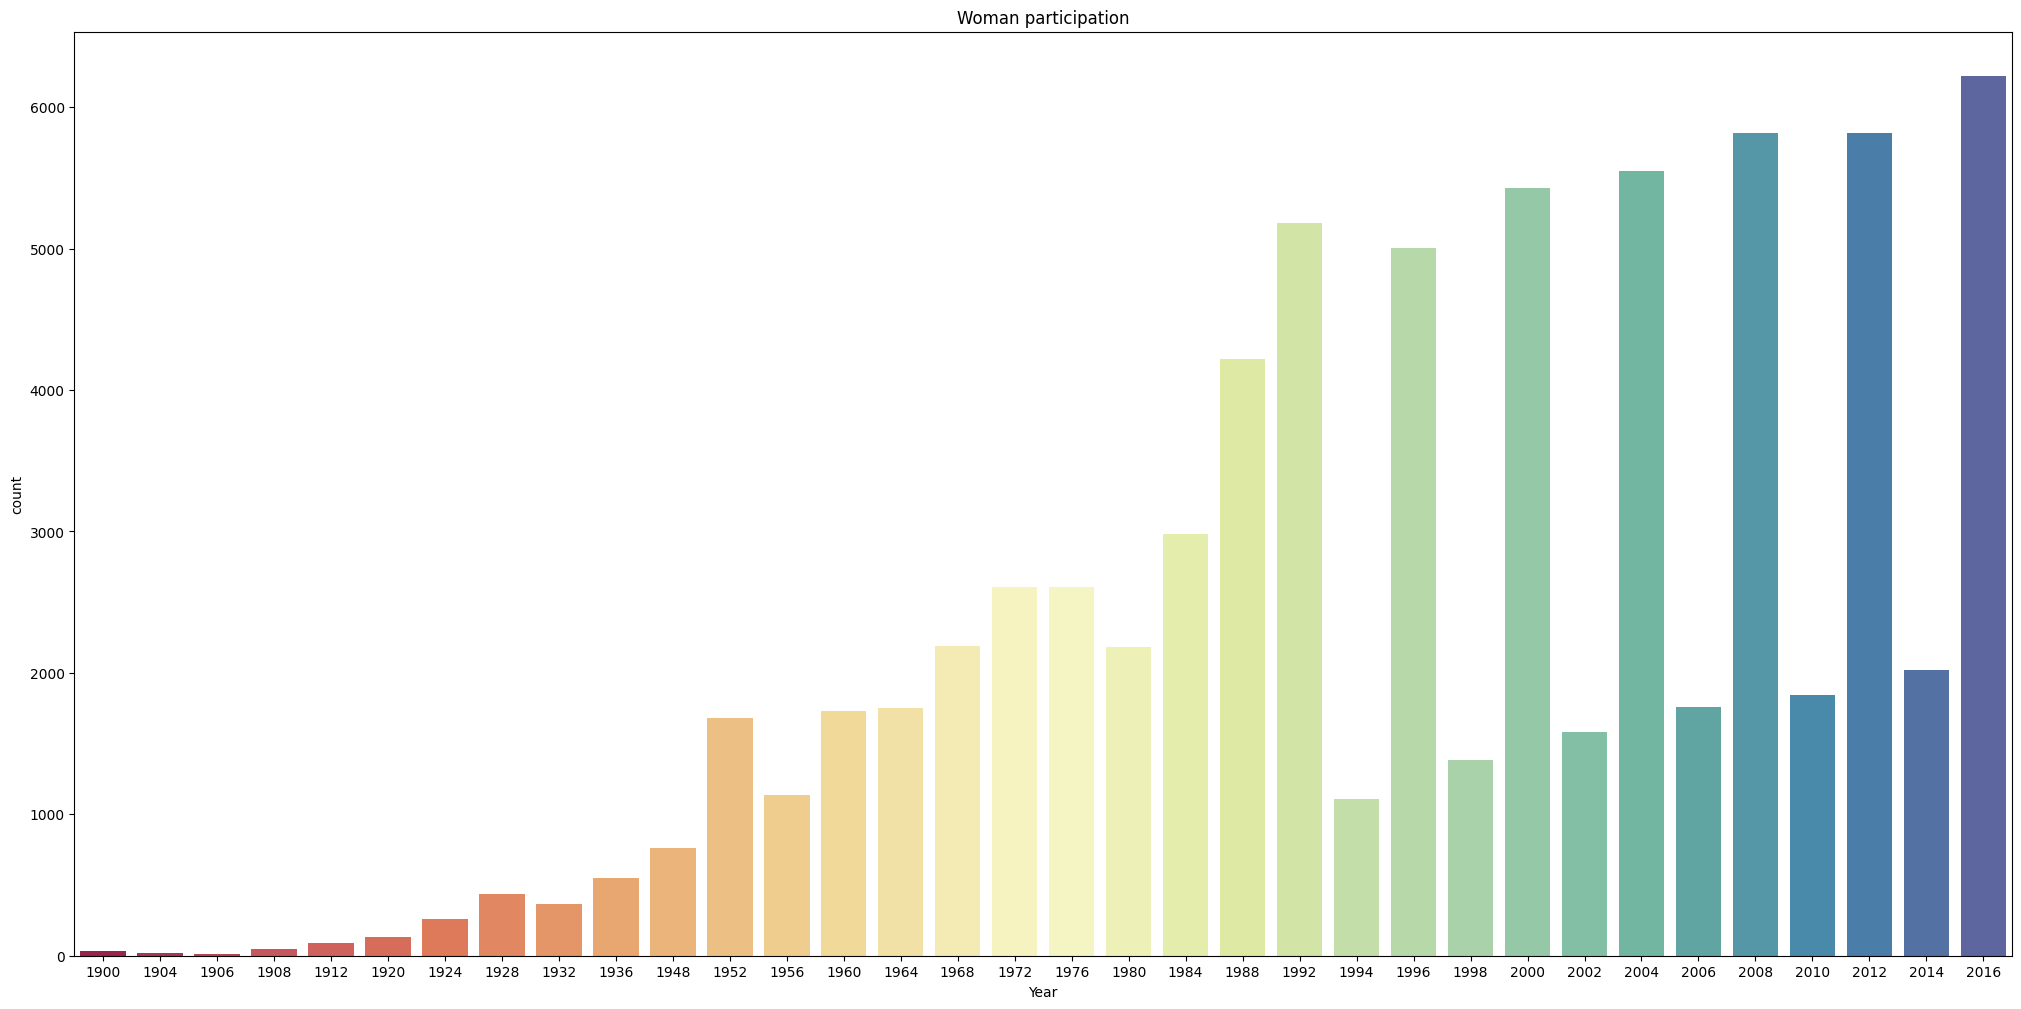

In [12]:
plt.figure(figsize=(25,12))
plt.title('Woman participation')
woman=athlete_df[(athlete_df.Sex =='F')]
sns.countplot(x='Year',data=woman,palette='Spectral')

C:\Users\mishr\AppData\Local\Temp\ipykernel_19336\3228945009.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Year', y='Count', data=female_counts, marker='o', palette='Spectral')


<Axes: title={'center': 'Woman Participation Over Time'}, xlabel='Year', ylabel='Count'>

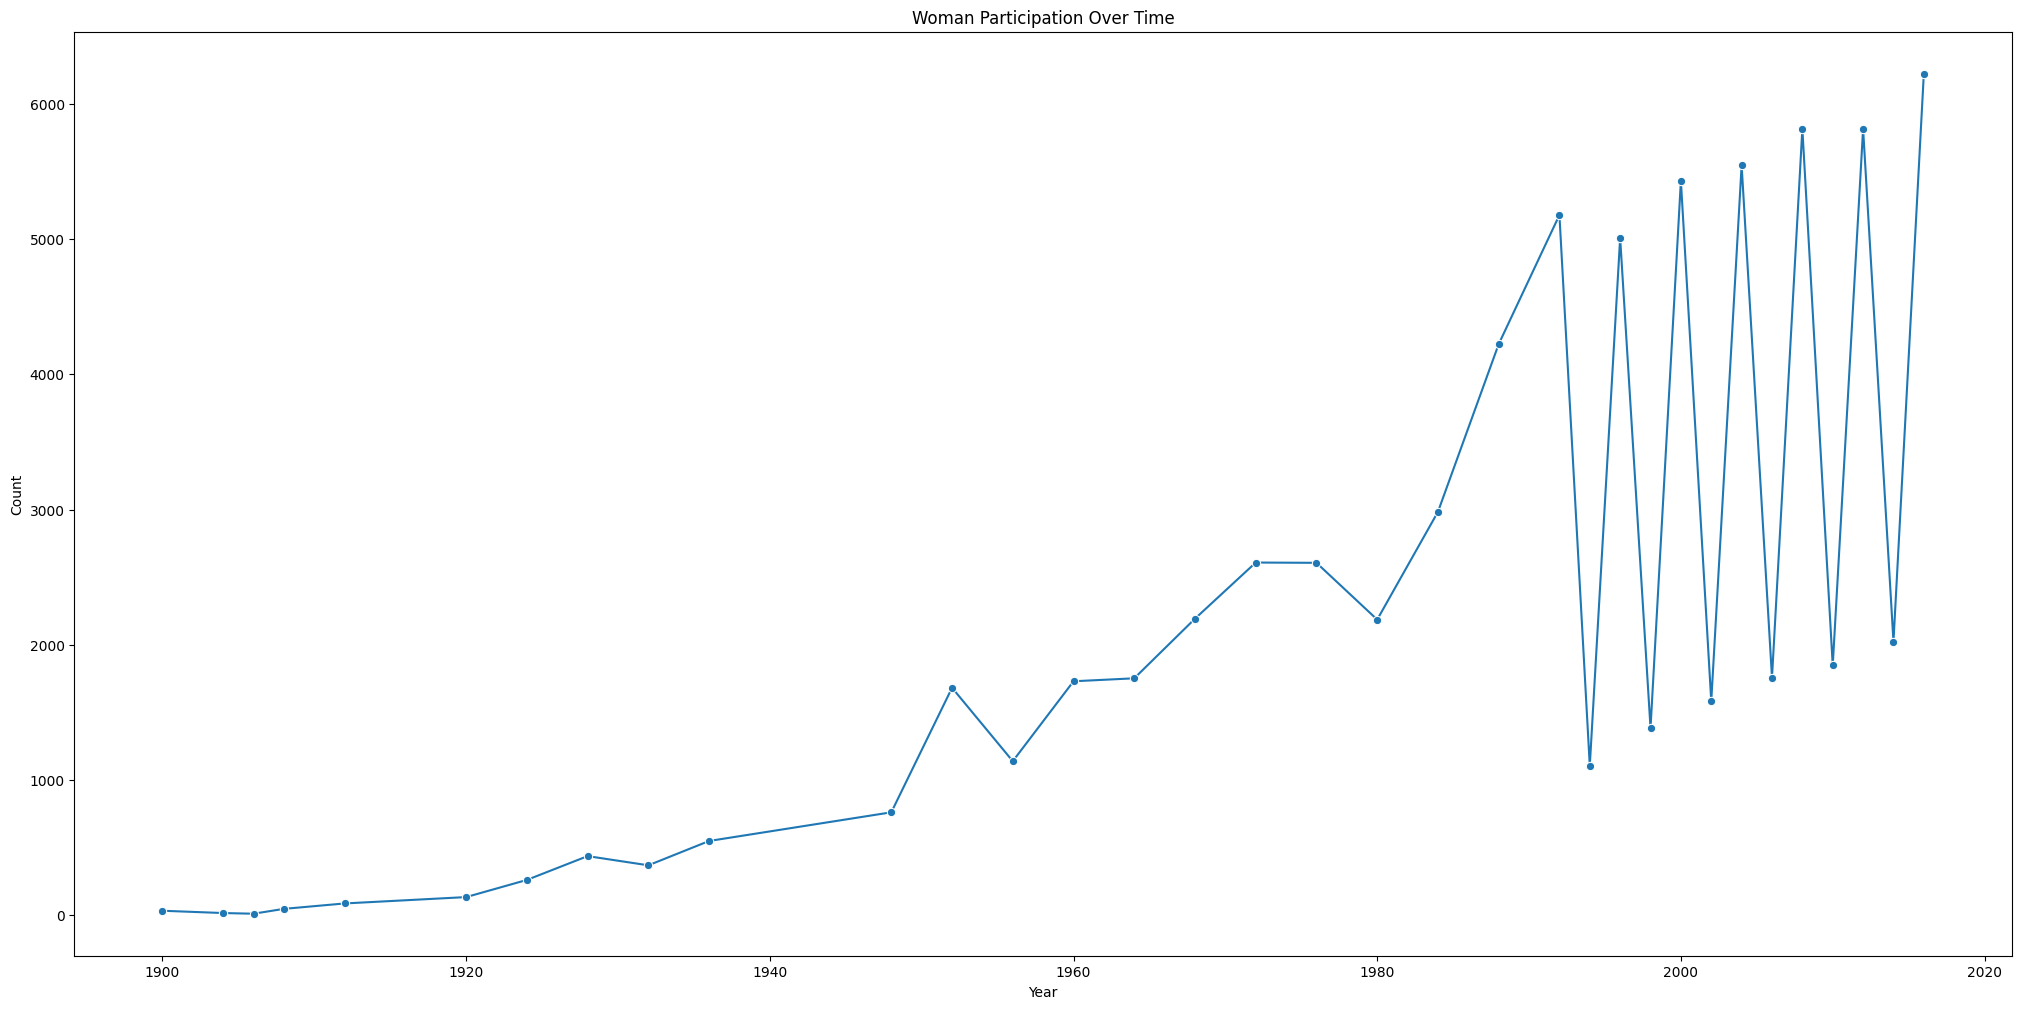

In [13]:
female_counts = woman.groupby('Year').size().reset_index(name='Count')

# Create a line plot
plt.figure(figsize=(25, 12))
plt.title('Woman Participation Over Time')
sns.lineplot(x='Year', y='Count', data=female_counts, marker='o', palette='Spectral')

In [14]:
gold_medals=athlete_df[(athlete_df.Medal=='Gold')]
gold_medals=gold_medals[np.isfinite(gold_medals['Age'])]
gold_medals.count()
sporting_event=gold_medals['Sport'][gold_medals['Age']>60]
sporting_event
gold_medals.Region.value_counts().reset_index(name='medal')
medal_counts=gold_medals.Region.value_counts().reset_index(name='medal')
medal_counts.columns = ['Region', 'medal']

<Figure size 2500x1200 with 0 Axes>

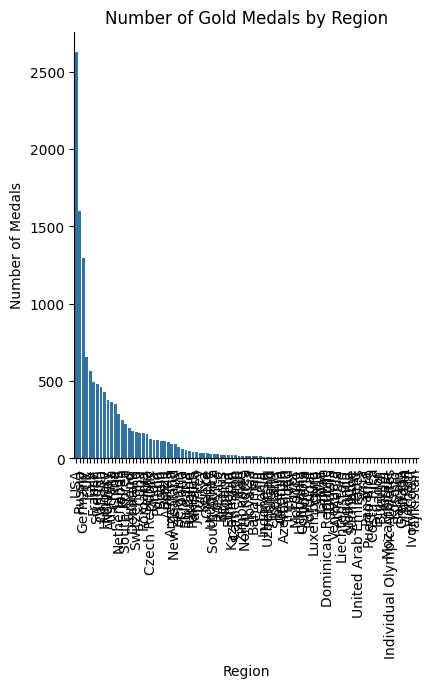

In [15]:
# Create a categorical plot using seaborn
plt.figure(figsize=(25, 12))  # Adjust the figure size as needed
sns.catplot(x='Region', y='medal', data=medal_counts, kind='bar')

# Set plot title and labels
plt.title('Number of Gold Medals by Region')
plt.xlabel('Region')
plt.ylabel('Number of Medals')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


<Axes: title={'center': 'Height vs Weight of Olympic Medalist'}, xlabel='Height', ylabel='Weight'>

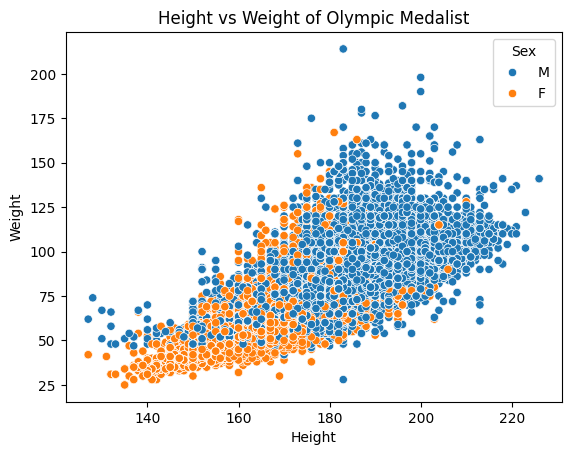

In [16]:
not_null_medals=athlete_df[(athlete_df['Height'].notnull())&(athlete_df['Weight'].notnull())]
plt.title('Height vs Weight of Olympic Medalist')
sns.scatterplot(x=not_null_medals['Height'],y=not_null_medals['Weight'],hue=not_null_medals['Sex'])